# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Ajao Wasiu Bamidele</h2>

# Data

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\bamidele\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [5]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analys missing values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [7]:
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [8]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [9]:
data.shape

(3333, 11)

In [10]:
data.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [11]:
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.columns

Index([], dtype='object')

In [12]:
numerical_features = data.select_dtypes(exclude=[np.object])
numerical_features.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [13]:
data.skew()

Churn              2.018356
AccountWeeks       0.096606
ContractRenewal   -2.726332
DataPlan           0.999140
DataUsage          1.272057
CustServCalls      1.091359
DayMins           -0.029077
DayCalls          -0.111787
MonthlyCharge      0.594498
OverageFee        -0.023845
RoamMins          -0.245136
dtype: float64

In [14]:
data.kurt()

Churn              2.075006
AccountWeeks      -0.107836
ContractRenewal    5.436146
DataPlan          -1.002322
DataUsage          0.042630
CustServCalls      1.730914
DayMins           -0.019940
DayCalls           0.243182
MonthlyCharge     -0.016808
OverageFee         0.025699
RoamMins           0.609185
dtype: float64

In [15]:
data.groupby('Churn').size()/len(data) # What is the percentage of churners

Churn
0    0.855086
1    0.144914
dtype: float64

# Exploratory Data Analysis

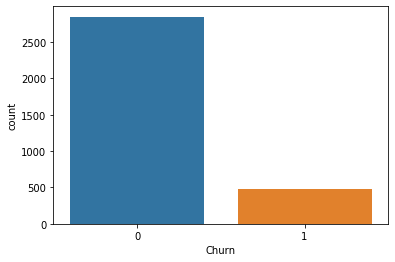

In [16]:
# Our label Distribution (countplot)
sns.countplot(x='Churn', data=data)
plt.show()

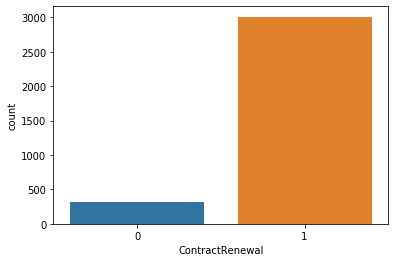

In [17]:
sns.countplot(x='ContractRenewal', data=data)
plt.show()

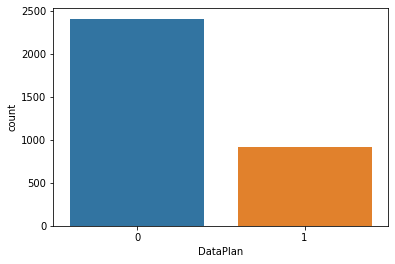

In [18]:
sns.countplot(x='DataPlan', data=data)
plt.show()

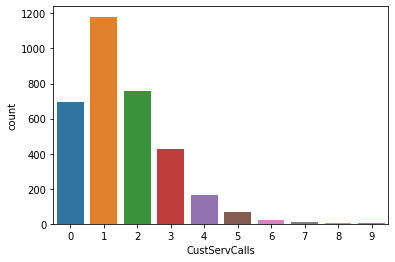

In [19]:
sns.countplot(x='CustServCalls', data=data)
plt.show()

In [20]:
# Example E

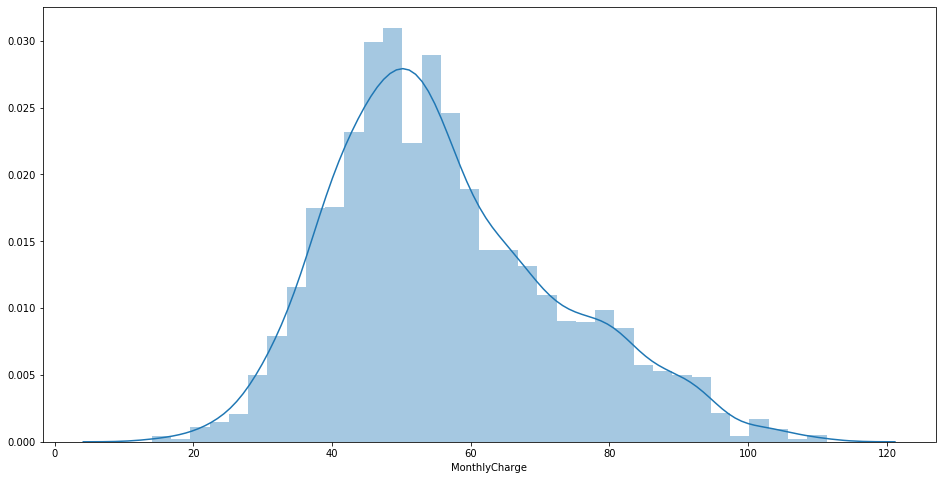

In [21]:
plt.figure(figsize=(16, 8))
sns.distplot(data["MonthlyCharge"])

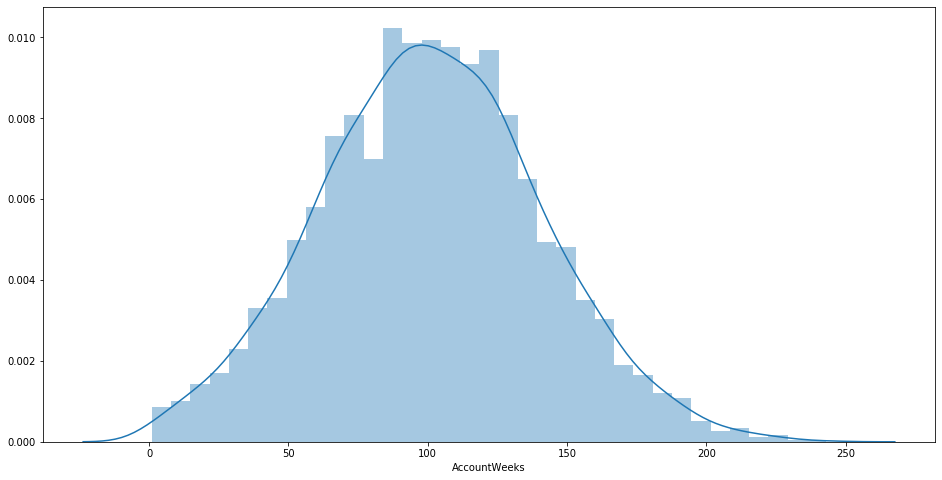

In [22]:
plt.figure(figsize=(16, 8))
sns.distplot(data["AccountWeeks"])

In [23]:
np.unique(data.MonthlyCharge.values);

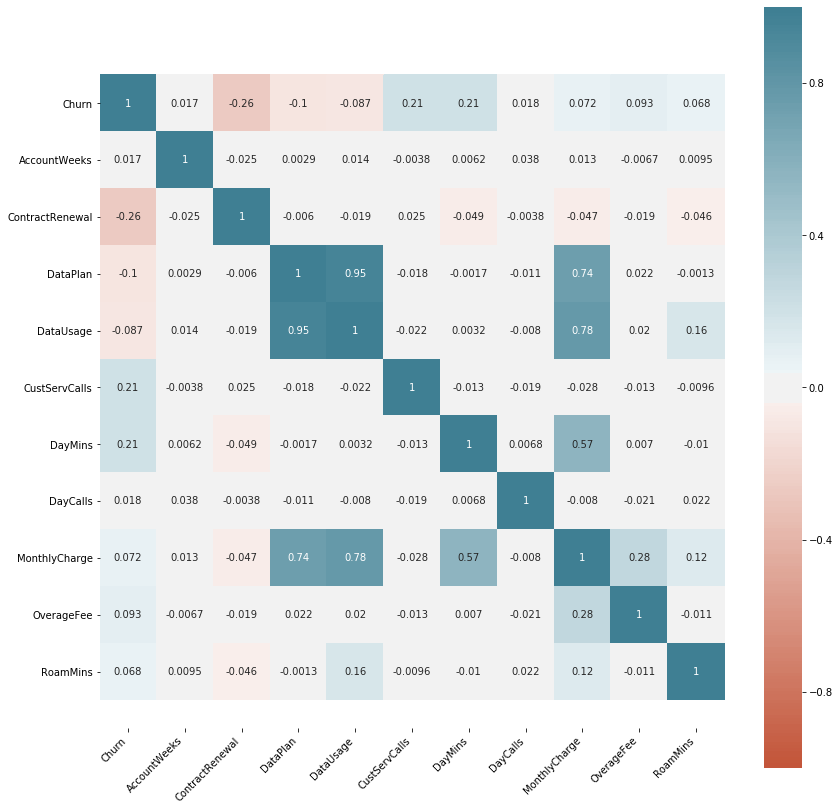

In [24]:
import seaborn as sns
corr = data.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [25]:
np.unique(data.MonthlyCharge.values);

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV #we will do hyperparameters tuning
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_validate
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, confusion_matrix, mean_squared_error, log_loss
from sklearn.metrics import classification_report


In [28]:
y = data.Churn
X = data.drop(columns=['Churn'], axis = 1)

In [29]:
X.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [30]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size =0.3, random_state = 1234)

In [34]:
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

X

array([[0.52479339, 1.        , 1.        , ..., 0.77081192, 0.54260583,
        0.5       ],
       [0.43801653, 1.        , 1.        , ..., 0.69886948, 0.53765805,
        0.685     ],
       [0.56198347, 1.        , 0.        , ..., 0.39054471, 0.33315008,
        0.61      ],
       ...,
       [0.11157025, 1.        , 0.        , ..., 0.43165468, 0.79384277,
        0.705     ],
       [0.75619835, 0.        , 0.        , ..., 0.36998972, 0.43870258,
        0.25      ],
       [0.30165289, 1.        , 1.        , ..., 0.88386434, 0.73117097,
        0.685     ]])

In [36]:
cat = CatBoostClassifier(num_trees = 500, verbose = 500, l2_leaf_reg = 9, max_depth = 5, learning_rate = 0.05, eval_metric='AUC', random_state = 0)

clf = AdaBoostClassifier(cat, n_estimators = 20, random_state = 0, algorithm = 'SAMME.R', learning_rate = 0.05 )

In [37]:
clf.fit(X_train, y_train)

0:	total: 780ms	remaining: 6m 29s
499:	total: 19.8s	remaining: 0us
0:	total: 82ms	remaining: 40.9s
499:	total: 16s	remaining: 0us
0:	total: 19.1ms	remaining: 9.52s
499:	total: 18.8s	remaining: 0us
0:	total: 97.9ms	remaining: 48.8s
499:	total: 18.2s	remaining: 0us
0:	total: 21.3ms	remaining: 10.6s
499:	total: 17.6s	remaining: 0us
0:	total: 24.9ms	remaining: 12.4s
499:	total: 12.2s	remaining: 0us
0:	total: 40ms	remaining: 20s
499:	total: 16.9s	remaining: 0us
0:	total: 118ms	remaining: 58.8s
499:	total: 17.6s	remaining: 0us
0:	total: 17.5ms	remaining: 8.72s
499:	total: 16.7s	remaining: 0us
0:	total: 19.3ms	remaining: 9.63s
499:	total: 14.9s	remaining: 0us
0:	total: 37.8ms	remaining: 18.9s
499:	total: 15.5s	remaining: 0us
0:	total: 20.4ms	remaining: 10.2s
499:	total: 12.7s	remaining: 0us
0:	total: 22.1ms	remaining: 11s
499:	total: 18.2s	remaining: 0us
0:	total: 31.7ms	remaining: 15.8s
499:	total: 19.7s	remaining: 0us
0:	total: 15.2ms	remaining: 7.57s
499:	total: 21.4s	remaining: 0us
0:	tot

AdaBoostClassifier(base_estimator=<catboost.core.CatBoostClassifier object at 0x00000206914E1940>,
                   learning_rate=0.05, n_estimators=20, random_state=0)

# Evaluation
Evaluate models for both train and test dataset.
Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.
Select the best performing model and write your comments about why choose this model.
Analyse results and make comment about how you can improve model.



# CatBoostClassifier

In [46]:
ypred = clf.predict(X_test)

In [47]:
ydec = clf.predict_proba(X_test)[:, 1]

In [48]:
print(accuracy_score(y_test, ypred))

0.955


In [49]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       848
           1       0.93      0.76      0.84       152

    accuracy                           0.95      1000
   macro avg       0.95      0.87      0.91      1000
weighted avg       0.95      0.95      0.95      1000



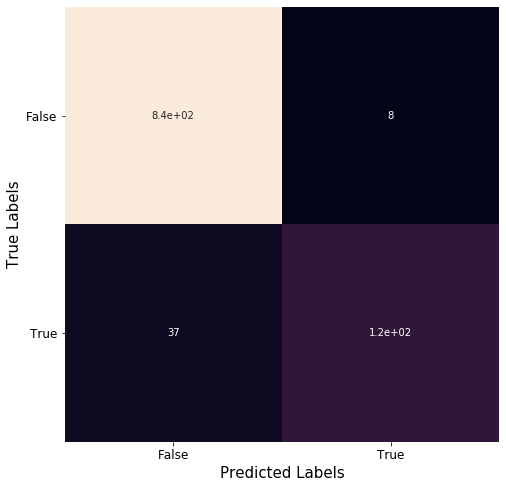

In [50]:
cm = confusion_matrix(y_test, ypred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

cv = cross_validate(clf,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)


print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

# Decision Tree

In [63]:
%%time
tree = DecisionTreeClassifier(random_state=75)
tree.fit(X_train,y_train)
y_tree_pred = tree.predict(X_test)

Wall time: 265 ms


In [64]:
tree_score = roc_auc_score(y_true=y_test,y_score=y_tree_pred)
print('Decision score : {}'.format(tree_score))

Decision score : 0.8237648957298908


In [65]:
print(classification_report(y_test, y_tree_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       848
           1       0.65      0.72      0.68       152

    accuracy                           0.90      1000
   macro avg       0.80      0.82      0.81      1000
weighted avg       0.90      0.90      0.90      1000



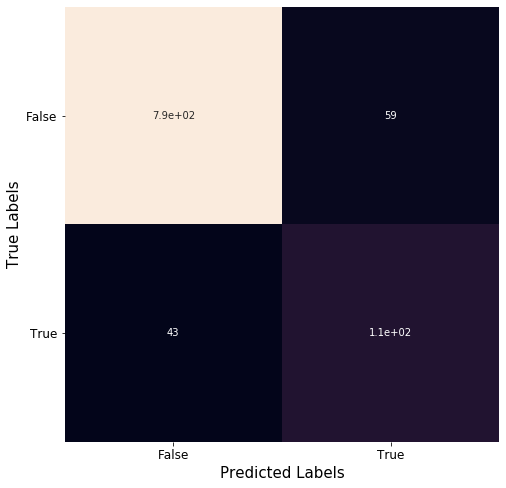

In [68]:
cm = confusion_matrix(y_test, y_tree_pred )
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [66]:
%%time
logit = LogisticRegression(random_state=75, solver='liblinear') #We set a random state so that the results are reproducible
logit.fit(X_train, y_train) #We train the model
y_logit_pred = logit.predict(X_test) #We make predictions

Wall time: 175 ms


In [69]:
logit_score = roc_auc_score(y_true=y_test,y_score=y_logit_pred)
print('Logistic Regression score : {}'.format(logit_score))

Logistic Regression score : 0.5524764150943396


In [70]:
print(classification_report(y_test, y_logit_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       848
           1       0.53      0.12      0.20       152

    accuracy                           0.85      1000
   macro avg       0.69      0.55      0.56      1000
weighted avg       0.81      0.85      0.81      1000



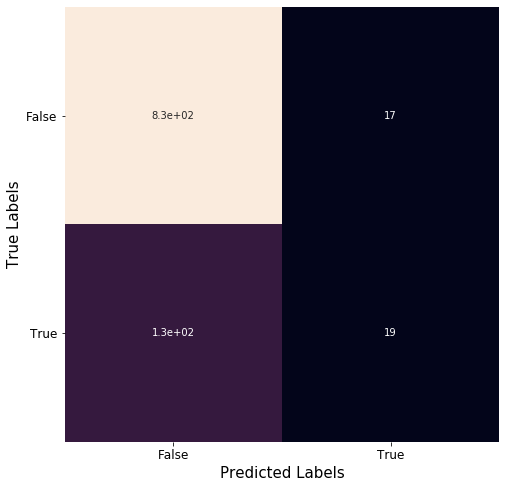

In [71]:
cm = confusion_matrix(y_test, y_logit_pred )
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Comments 

In [ ]:
CatBoostClassifier performs better as the accuracy is 95.5%
If cross-validate the data, it improves the prediction
